In [2]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
# Set of colors
colors=[
    ['black', 'dimgray', 'darkgray'],
    ['darkred', 'firebrick', 'red'],
    #['saddlebrown', 'chocolate', 'sandybrown'],
    ['darkgoldenrod', 'goldenrod', 'gold'],
    ['darkgreen', 'forestgreen', 'limegreen'],
    ['darkslategray', 'teal', 'deepskyblue'],
    ['darkblue', 'blue', 'royalblue'],
    ['purple', 'darkorchid', 'mediumorchid'], 
]

# Problem 4
Merged $m_1$ and $m_2$ mass objects are shot vertically upwards at initial speed $v_0$.<br>

The coefficient of air resistance of the connected bodies is equal $k_s$.<br>

After $ts$ time, objects begin to move individually.
The coefficients of air resistance for individually moving objects are accordingly $k_1$ and $k_2$.<br>
The air resistance is proportional to the square of the object's velocity.<br>

- **Find how the velocities of objects change from 0s till $t_{max}$.**
- **When will each object reach its peak and start descending?** Use free fall acceleration $g = 9,8 m/s^2$.

| $\mathbf{m_1}$, kg | $\mathbf{m_2}$, kg | $\mathbf{v_0}$, m/s | $\mathbf{k_s}$, kg/m | $\mathbf{t_s}$, s | $\mathbf{k_1}$, kg/m | $\mathbf{k_2}$, kg/m | $\mathbf{t_{max}}$, s |
|-----------|-----------|------------|-------------|----------|-------------|-------------|--------------|
| 0.4       | 0.8       | 50         | 0.001       | 2        | 0.02        | 0.02        | 10           |

$F = F_{gravity} - F_{air\ resistance}$<br>
⇿ $\frac{dv}{dt} = \frac{mg - kv^2}{m}$

# Part 1
Construction of the ODE.

In [4]:
def dv(v, t, m, g, k):
  if v > 0:
    return (m*g-k*v**2)/m
  else:
    return (m*g+k*v**2)/m

# Problem data
g=-9.8

tmin=0
ts=2
tmax=10

# Object properties
m1=0.4
m2=0.8
ms=m1+m2
v0=50
k1=0.02
k2=0.02
ks=0.001

# Part 2
Soving constructed ODU using Euler's method

v=0m/s found at:
 - 3.5700000000000003s for Object 1
 - 3.92s for Object 2


(-25.0, 55.0)

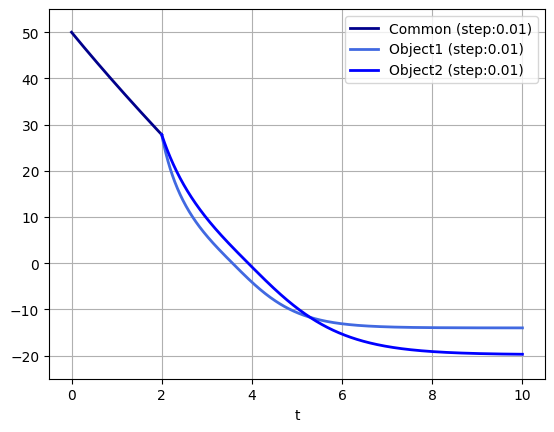

In [5]:
def euler(dt=0.01, colorNb=5, style='-', width = 2, print0=False):
  minV1 = abs(v0)
  minT1 = 0
  minV2 = abs(v0)
  minT2 = 0
  definitionIterations = int((ts-tmin)/dt)
  lockedComT = np.zeros((definitionIterations +1, 1))
  lockedCommonVelocities = np.zeros_like(lockedComT)
  lockedCommonVelocities[0] = v0
  for i in range(definitionIterations):
    t = i*dt
    v = lockedCommonVelocities[i]
    v = v + dt*dv(v, t, ms, g, ks)
    if abs(v) < minV1:
      minV1 = abs(v)
      minV2 = abs(v)
      minT1 = (i+1)*dt
      minT2 = (i+1)*dt
    lockedCommonVelocities[i+1] = v
    lockedComT[i+1] = (i+1)*dt

  plt.plot(lockedComT, lockedCommonVelocities, colors[colorNb][0], linestyle = style, linewidth = width, label = "Common (step:" + str(dt) + ")")

  # Split object 1
  definitionIterations = int((tmax-ts)/dt)
  lockedObj1T = np.zeros((definitionIterations +1, 1))
  lockedObj1T[0] = ts
  lockedObj1Velocities = np.zeros_like(lockedObj1T)
  lockedObj1Velocities[0] = lockedCommonVelocities[len(lockedCommonVelocities) - 1]
  for i in range(definitionIterations):
    t = ts+i*dt
    v = lockedObj1Velocities[i]
    v = v + dt*dv(v, t, m1, g, k1)
    lockedObj1Velocities[i+1] = v
    lockedObj1T[i+1] = ts+(i+1)*dt
    if abs(v) < minV1:
      minV1 = abs(v)
      minT1 = ts+(i+1)*dt
  plt.plot(lockedObj1T, lockedObj1Velocities, colors[colorNb][2],linestyle = style, linewidth = width, label = "Object1 (step:" + str(dt) + ")")

  # Split object 2
  definitionIterations = int((tmax-ts)/dt)
  lockedObj2T = np.zeros((definitionIterations +1, 1))
  lockedObj2T[0] = ts
  lockedObj2Velocities = np.zeros_like(lockedObj2T)
  lockedObj2Velocities[0] = lockedCommonVelocities[len(lockedCommonVelocities) - 1]
  for i in range(definitionIterations):
    t = ts+i*dt
    v = lockedObj2Velocities[i]
    v = v + dt*dv(v, t, m2, g, k2)
    lockedObj2Velocities[i+1] = v
    lockedObj2T[i+1] = ts+(i+1)*dt
    if abs(v) < minV2:
      minV2 = abs(v)
      minT2 = ts+(i+1)*dt

  plt.plot(lockedObj2T, lockedObj2Velocities, colors[colorNb][1],linestyle = style, linewidth = width, label = "Object2 (step:" + str(dt) + ")")
  
  if print0:
    print("v=0m/s found at:")
    print(" - " + str(minT1) + "s for Object 1")
    print(" - " + str(minT2) + "s for Object 2")

euler(print0=True)
plt.legend()
plt.grid()
plt.xlabel('t')  
plt.ylim([-25, 55])

# Part 3
Verifications of the accuracy of the solution
Provide solutions with timesteps 1, 0.5, 0.25...

(-25.0, 55.0)

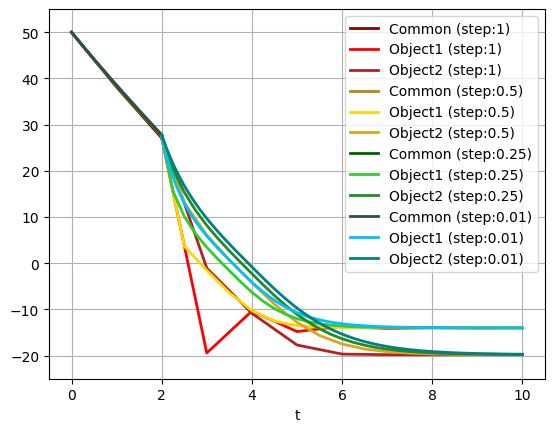

In [6]:
DT = [1, .5, .25, .01]
lineColor=0
for dt in DT:
  lineColor+=1
  euler(dt, lineColor)

plt.legend()
plt.grid()
plt.xlabel('t')  
plt.ylim([-25, 55])

# Part 4
Find the largest possible timestep for the solution to maintain stability

(-100.0, 100.0)

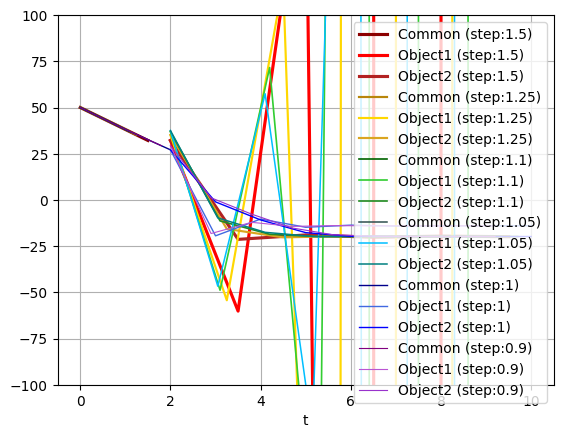

In [7]:
DT = [1.5, 1.25, 1.1, 1.05, 1, 0.9]
lineColor=0
for dt in DT:
  lineColor+=1
  euler(dt, lineColor, '-', dt**2)

plt.legend()
plt.grid()
plt.xlabel('t')  
plt.ylim([-100, 100])

# Part 5
Solve the ODE with standard library function

(-25.0, 55.0)

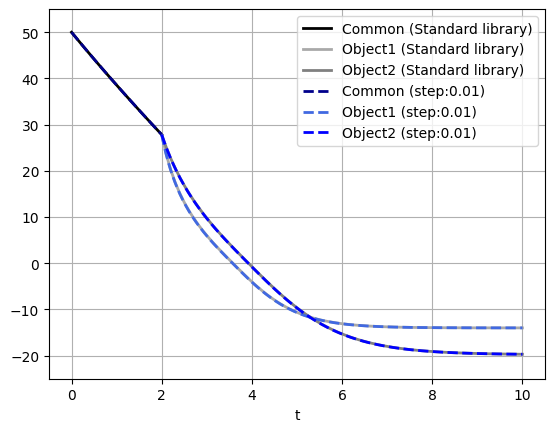

In [8]:
definition=100
numberOfCommonValues = int(definition*ts / tmax)
tCommonValues = np.linspace(tmin, ts, numberOfCommonValues)
numberOfSplitValues = int(definition*(1-ts/tmax))
tSplitValues = np.linspace(ts, tmax, numberOfSplitValues)

commonSol = odeint(dv, v0, tCommonValues, args = (ms, g, ks))
plt.plot(tCommonValues, commonSol, 'k', label = "Common (Standard library)", linewidth = 2)

vs = float(commonSol[len(commonSol) - 1])
#ostillSol = odeint(dv, vs, tSplitValues, args = (ms, g, ks))
#plt.plot(tSplitValues, ostillSol, 'k--', label = "Object if not split", linewidth = .5)
o1Sol = odeint(dv, vs, tSplitValues, args = (m1, g, k1))
plt.plot(tSplitValues, o1Sol, 'darkgray', label = "Object1 (Standard library)", linewidth = 2)
o2Sol = odeint(dv, vs, tSplitValues, args = (m2, g, k2))
plt.plot(tSplitValues, o2Sol, 'gray', label = "Object2 (Standard library)", linewidth = 2)

euler(style='--')

plt.legend()
plt.xlabel('t')
plt.grid()
plt.ylim([-25, 55])

(-15.0, -10.0)

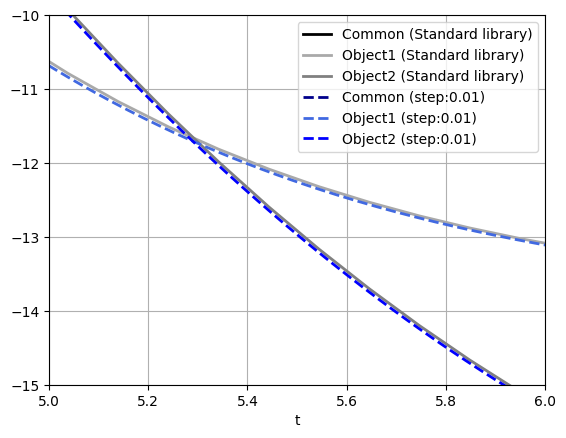

In [9]:
plt.plot(tCommonValues, commonSol, 'k', label = "Common (Standard library)", linewidth = 2)
plt.plot(tSplitValues, o1Sol, 'darkgray', label = "Object1 (Standard library)", linewidth = 2)
plt.plot(tSplitValues, o2Sol, 'gray', label = "Object2 (Standard library)", linewidth = 2)

euler(style='--')

plt.legend()
plt.xlabel('t')
plt.grid()
plt.xlim([5, 6])
plt.ylim([-15, -10])